In [1]:
car_img_path = "/content/car.jpeg"

In [2]:
car_img_path

'/content/car.jpeg'

In [3]:
import tensorflow as tf
import numpy as np
import cv2 # OpenCV
import matplotlib.pyplot as plt
import sys

In [4]:
import os
if not os.path.exists(car_img_path):
    print(f"Error: Image file not found at {car_img_path}")
    # Stop the further execution
    sys.exit(1)
img = cv2.imread(car_img_path)

In [5]:
type(img)

numpy.ndarray

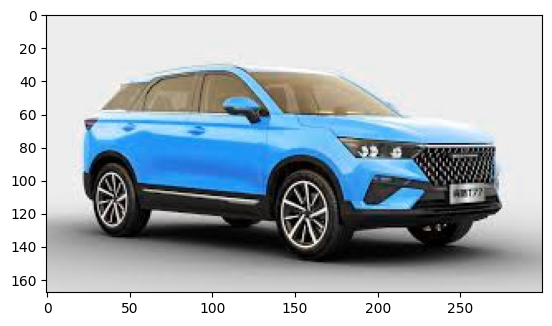

In [6]:
plt.imshow(img)

In [7]:
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

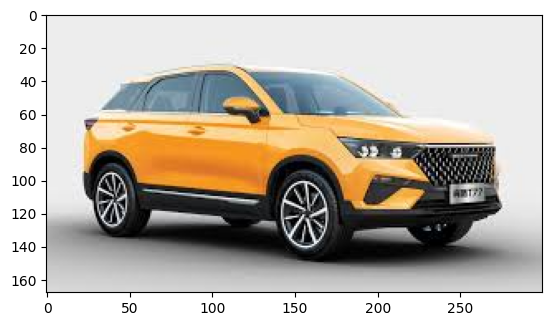

In [8]:
plt.imshow(img2)

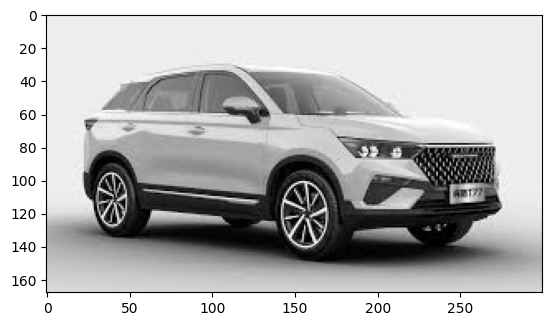

In [9]:
img3 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img3,cmap='grey')

In [10]:
img.shape

(168, 300, 3)

In [11]:
row , col =img3.shape

In [28]:
car = img3.reshape(1,row,col,1)

In [29]:
car.shape

(1, 168, 300, 1)

In [38]:
conv_layer = tf.keras.layers.Conv2D(
    filters=1,
    kernel_size = (3,3),
    strides = (1,1),
    input_shape = car.shape[1:]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
conv_layer

<Conv2D name=conv2d_5, built=False>

In [40]:
conv_model = tf.keras.Sequential([conv_layer])

In [41]:
conv_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 166, 298, 1)         │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
# No. of parameters are 10 : kernel size is 3x3=9 , 1 is the bias here

In [44]:
output = conv_model.predict(car)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [45]:
# This output is my conoluted img

In [46]:
output.shape

(1, 166, 298, 1)

In [47]:
output

array([[[[-228.50847],
         [-228.50847],
         [-228.50847],
         ...,
         [-228.50847],
         [-228.50847],
         [-228.50847]],

        [[-228.50847],
         [-228.50847],
         [-228.50847],
         ...,
         [-228.50847],
         [-228.50847],
         [-228.50847]],

        [[-228.50847],
         [-228.50847],
         [-228.50847],
         ...,
         [-228.50847],
         [-228.50847],
         [-228.50847]],

        ...,

        [[-206.86546],
         [-206.86546],
         [-206.86546],
         ...,
         [-202.30376],
         [-202.30376],
         [-202.30376]],

        [[-208.91608],
         [-208.91608],
         [-208.91608],
         ...,
         [-204.2321 ],
         [-204.2321 ],
         [-204.2321 ]],

        [[-209.4842 ],
         [-209.4842 ],
         [-209.4842 ],
         ...,
         [-206.02356],
         [-206.02356],
         [-206.02356]]]], dtype=float32)

In [52]:
row , col =output.shape[1:-1]

In [53]:
output.reshape(row,col)

array([[-228.50847, -228.50847, -228.50847, ..., -228.50847, -228.50847,
        -228.50847],
       [-228.50847, -228.50847, -228.50847, ..., -228.50847, -228.50847,
        -228.50847],
       [-228.50847, -228.50847, -228.50847, ..., -228.50847, -228.50847,
        -228.50847],
       ...,
       [-206.86546, -206.86546, -206.86546, ..., -202.30376, -202.30376,
        -202.30376],
       [-208.91608, -208.91608, -208.91608, ..., -204.2321 , -204.2321 ,
        -204.2321 ],
       [-209.4842 , -209.4842 , -209.4842 , ..., -206.02356, -206.02356,
        -206.02356]], dtype=float32)

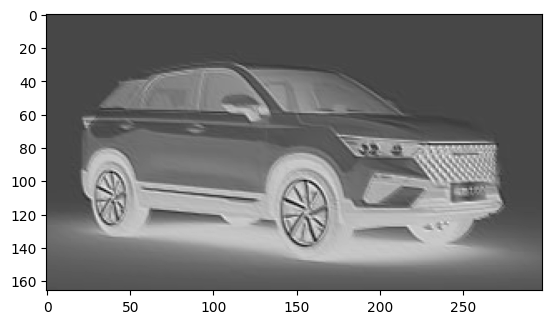

In [56]:
plt.imshow(output.reshape(row,col),cmap='grey')